### Analysis of the MSR dataset
**Wojciech Artichowicz**

**Library imports**

In [10]:
library(openxlsx)
library(ggplot2)
library(GGally)
library(FactoMineR)
library(factoextra)
library(corrplot)
library(egg)

**Reading the data**

In [2]:
df = openxlsx::read.xlsx("dataMSR.xlsx")
nrow(df)
head(df)

[1] 49

Purity,logPBS,logPsol.,Vm.of.sol.,pH,T,CMC,MSR
3,4.86,6.69,213.78,7,23,50.5,0.740
3,4.86,6.69,213.78,7,23,45.5,0.680
5,4.86,6.69,213.78,7,23,36.7,0.928
3,4.61,6.69,213.78,7,23,37.7,0.660
3,4.61,6.69,213.78,9,23,33.4,0.270
5,5.21,8.54,290.98,7,23,21.0,0.795


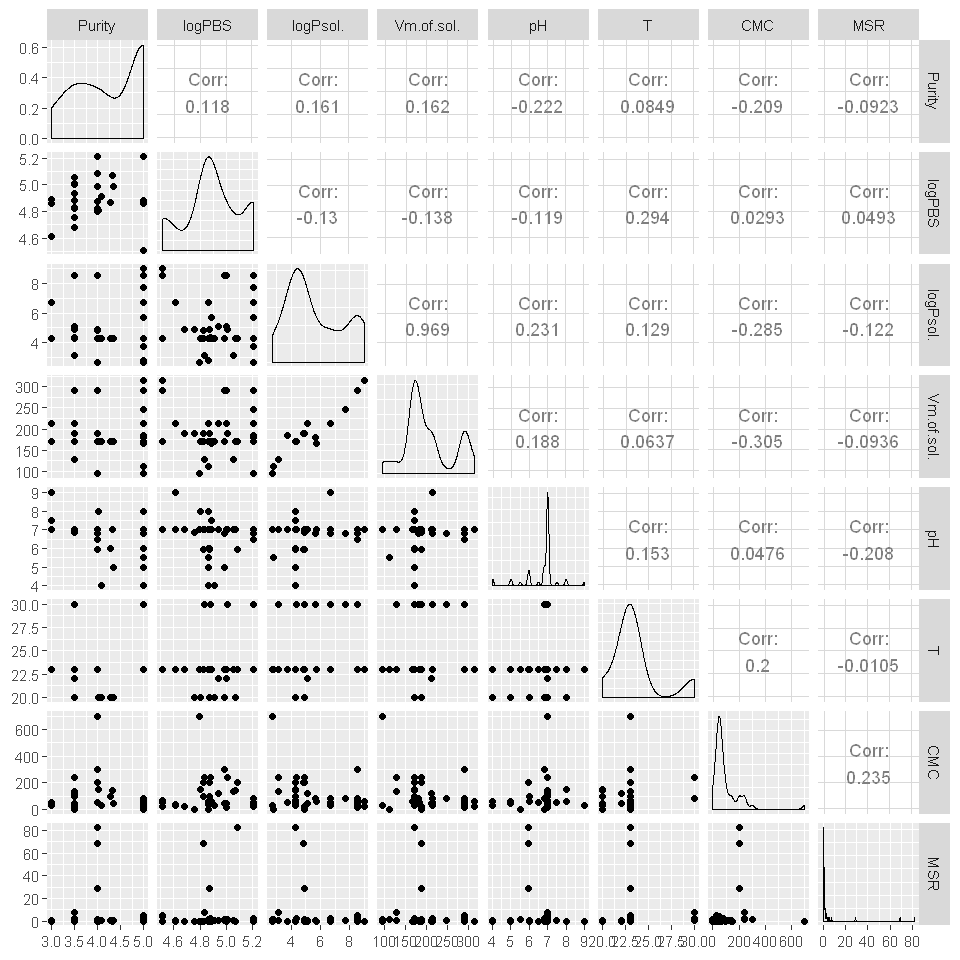

In [3]:
options(repr.plot.width = 8, repr.plot.height = 8)
GGally::ggpairs(df)

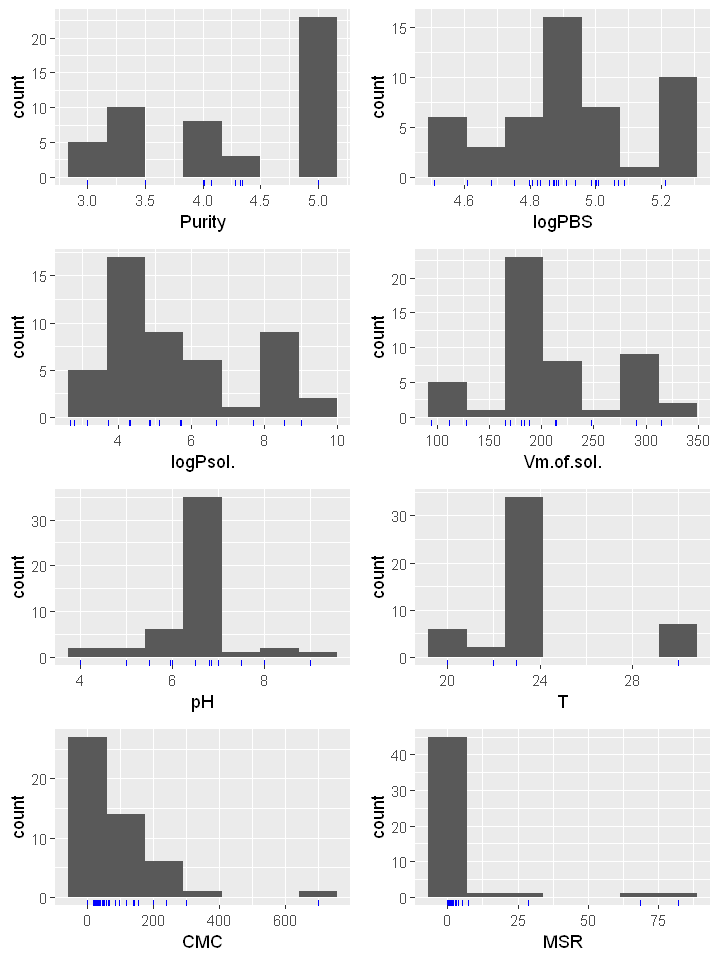

In [4]:
options(repr.plot.width=6, repr.plot.height =8)
histList <- sapply(names(df), function(col) {
    ggplot(data = df,aes(x = df[,col])) +  
    geom_histogram(bins = nrow(df)^0.5) +geom_rug( colour="blue")+ xlab(col) 
}, simplify=FALSE)
grid.arrange(grobs = histList, ncol=2)

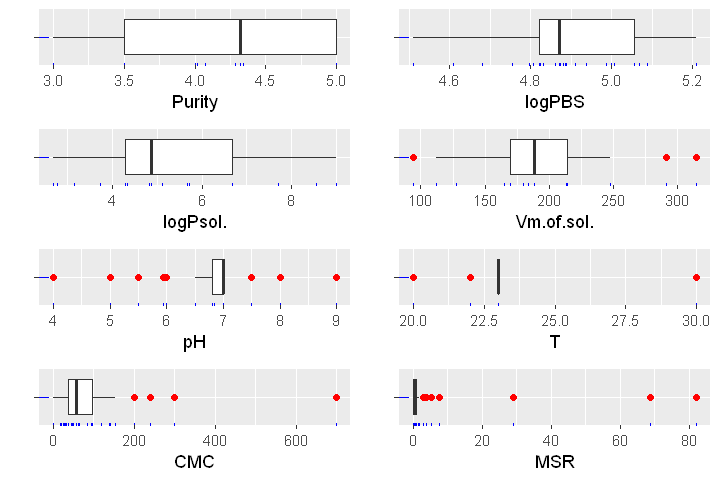

In [5]:
options(repr.plot.width=6, repr.plot.height =4)
boxList <- sapply(names(df), function(col) {
        ggplot(data = df,aes(x = "", y = df[,col] )) + geom_boxplot(outlier.colour="red") + coord_flip() + 
        geom_rug(colour="blue") + ylab(col) + xlab("")
}, simplify=FALSE)
grid.arrange(grobs = boxList, ncol=2)

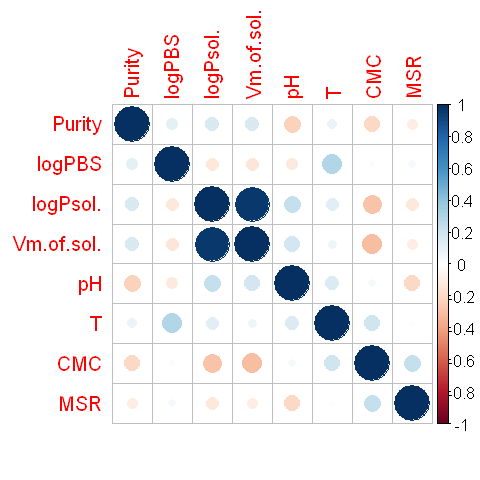

In [6]:
options(repr.plot.width=4, repr.plot.height =4)
corrplot::corrplot(cor(df))

In [7]:
msr.pca = FactoMineR::PCA(df, scale.unit=TRUE, ncp=ncol(df), graph=TRUE) 

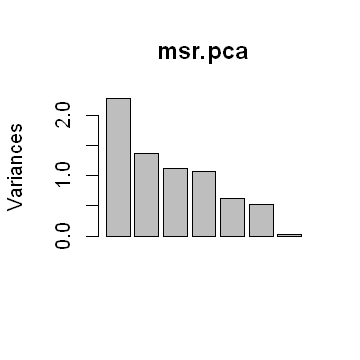

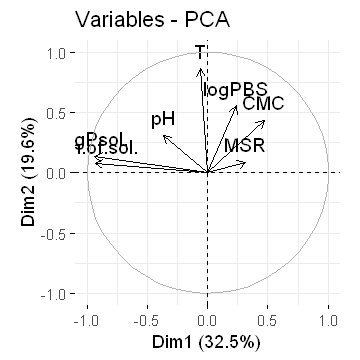

In [8]:
options(repr.plot.width=3, repr.plot.height =3)
msr.pca <- prcomp(df[,-1],  scale = TRUE)
screeplot(msr.pca)
fviz_pca_var(msr.pca, col.var = "black")

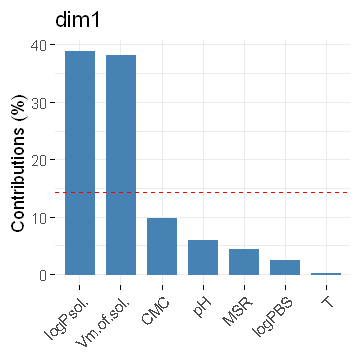

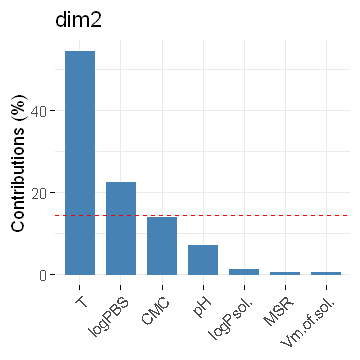

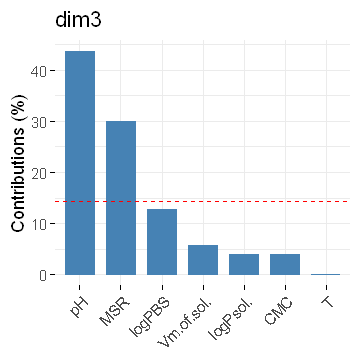

In [9]:
fviz_contrib(msr.pca, choice="var", axes = 1) + ggtitle("dim1")
fviz_contrib(msr.pca, choice="var", axes = 2 ) + ggtitle("dim2")
fviz_contrib(msr.pca, choice="var", axes = 3 ) + ggtitle("dim3")